## Final Project Submission

Please fill out:
* Student name: Dennis Muthama Mwanzia
* Student pace: Full time
* Scheduled project review date/time: March 2023
* Instructor name: William Okomba
* Blog post URL:Github


# Overview

# Business Problem

Microsoft has seen big companies create original video content, and they have dediced to enter in the industry. However, they have no understanding of the movie industry. As a data scientist, they have hired me to help them better understand the film industry. I am tasked with exploring the type of films that are currently best performing at the box office. I will be exploring the type of films that are currently performing best at the box office and then i will translate these findings into actionable insights that the head of the Microsoft New Movie studio will use to decide what type of films to create. 

## Objectives/Questions to be answered? 
1. What type of data do I have for analysis?
2. How was this data selected and why is it important to answer the above business problem? 
3. What type of movie genres are currently existing in the market?
4. What is the cost of production of these movie genres?
5. What are the features of these movie genres? Duration, Directors, Actors, Studios produced, etc?
6. What are the movie box offices for these genres?
7. What are the net incomes of these movie genres?
8. What are the Returns on Investment for these movie genres?
9. What type of movie genres are most profitable?

## Data Used for Analysis
The zipped file contains the following data
   1. Box Office Mojo Movie gross (domestic & worldwide)
   2. Movie information
   3. The Movie databse (TMDB)
   4. Movie budgets
   5. Movie reviews 
   




## Objectives & Approach
To do data analysis and make the necessary recommendations to Microsoft New Movie Studio, I analyzed all the datasets looking for specific variables that were useful in my analysis.
## Performance Metrics
I used the following dependent performance metric in my analysis.
1. Profitability measured by Return on Investment denoted as ROI
## The dependent Variables
1. Averaging Rating
2. Genres
3. runtime in Minutes
4. Number of votes 
5. Studio
6. Production budget

In [1]:
#I started by importing the following standard packages in python 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 
import seaborn as sns
%matplotlib inline 

# Loading Datasets

## 1. Loading the Box Office Mojo gross Dataset

In [2]:
#Import data using read_csv function of pandas & load 5 rows for inspection
#bom.movie_gross
bom_movie = pd.read_csv('bom.movie_gross.csv.gz')
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Data Exploration

In [3]:
# examine the data info 
bom_movie.info()
#The foreign_gross column even though it appears as an integer, its stored as an object,
# thus not suitable for statistical analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#Data inspection and exploration
# Examine if there are missing values
bom_movie.isna().any()
# Studio column, domestic_gross and foreign_gross columns all have missing data.
#Lets find out how many values are missing

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [5]:
bom_movie.isna().sum()
#foreign_gross have lots of missing data and hence we drop it
#domestic gross column has few missing data, we therefore replace with  median value since the median does not distort the 
# overall data distribution.
# Studio is a categorical data therefore since we cannot fill in missing information arbitraly, we fill null values with 
#missing

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
bom_movie['domestic_gross'].fillna(bom_movie['domestic_gross'].median(), inplace = True)

In [7]:
bom_movie['studio'].fillna('Missing', inplace = True)

In [8]:
bom_movie.drop('foreign_gross', axis=1, inplace=True)

In [9]:
bom_movie.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [10]:
#Lets now detect if there are any placeholder values in the remaining columns
bom_movie['title'].unique()

array(['Toy Story 3', 'Alice in Wonderland (2010)',
       'Harry Potter and the Deathly Hallows Part 1', ..., 'El Pacto',
       'The Swan', 'An Actor Prepares'], dtype=object)

In [11]:
bom_movie['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', 'Missing', 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand',
       'NGE', 'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK',
       'FInd.', 'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS',
       'Mont.', 'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM',
       'Vita.', 'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF',
       'IM', 'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket',
       'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4',
       'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer',
       'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC'

In [12]:
bom_movie['year'].unique()
#bom_movie dataset is now fully cleaned and can be used for analysis

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

# 2. Loading the Movie budgets dataset

In [13]:
budgets_movie = pd.read_csv('tn.movie_budgets.csv.gz')
budgets_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Data Exploration and Cleaning

In [14]:
budgets_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


A close examination of the info reveals that there dataset has no missing information. However, we needed to convert production_budget, domestic_gross and worldwide_gross from objects to floats by removing the commas and dollar sign to make the data suitable for statistical analysis. 

In [15]:
# Remove commas, $ signs and store columns as datatype float
budgets_movie['production_budget'] = budgets_movie['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
budgets_movie['domestic_gross'] = budgets_movie['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
budgets_movie['worldwide_gross'] = budgets_movie['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
#confirm that columns are now stored as floats
print(budgets_movie.dtypes)


id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


C:\Users\USER PC\AppData\Local\Temp\ipykernel_13156\3844833264.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets_movie['production_budget'] = budgets_movie['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\USER PC\AppData\Local\Temp\ipykernel_13156\3844833264.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets_movie['domestic_gross'] = budgets_movie['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\USER PC\AppData\Local\Temp\ipykernel_13156\3844833264.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular exp

In [16]:
#confirm that there is no missing information
budgets_movie.isna().sum()
#There is no missing data, we proceed to check for any special placeholder valuesb

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [17]:
budgets_movie['release_date'].unique()

array(['Dec 18, 2009', 'May 20, 2011', 'Jun 7, 2019', ..., 'Aug 14, 2008',
       'Feb 26, 1993', 'Jul 13, 2005'], dtype=object)

In [18]:
budgets_movie['movie'].unique()
#The data is cleaned and ready to be used for analysis

array(['Avatar', 'Pirates of the Caribbean: On Stranger Tides',
       'Dark Phoenix', ..., 'Return to the Land of Wonders',
       'A Plague So Pleasant', 'My Date With Drew'], dtype=object)

I needed to develop a profitability column that measures the Return on Investment for each movie. Therefore i proceeded to add a new column called ROI that measures the Rate of Return for each movie based on its domestic and world gross box revenues and rounded the figure to 2 decimal places. Its stored as datatype float.

In [19]:
budgets_movie['ROI'] = round(((budgets_movie['domestic_gross'] + budgets_movie['worldwide_gross'])-budgets_movie['production_budget']) / budgets_movie['production_budget'],2)

In [20]:
budgets_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,7.32
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.13
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.45
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,4.63
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,5.11


# 3. Loading Movie Information 

In [21]:
movie_info = pd.read_csv('rt.movie_info.tsv.gz', delimiter = '\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [22]:
movie_info.info()
#This data has 1560 entries but it appears individual columns of currency, box_office, studio have lots of missing data. 
#We count the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [23]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [24]:
#We drop currency, box_office, studio columns since there are lots of missing values
movie_info.drop(['currency','box_office','studio'], axis=1, inplace=True)
movie_info.isna().sum()


id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
runtime          30
dtype: int64

In [25]:
# Count the top 5 most common runtime in minutes 
top_5 = movie_info['runtime'].value_counts().head()
print(top_5)

90 minutes     72
95 minutes     66
100 minutes    51
93 minutes     47
96 minutes     43
Name: runtime, dtype: int64


# 4. Loading Movie reviews Dataset

In [26]:
movie_rev = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='unicode_escape')
movie_rev.head() 

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [27]:
movie_rev.info()
#there is obviously missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [28]:
movie_rev.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [29]:
top_6 = movie_rev['critic'].value_counts().head(6)
print(top_6)

Emanuel Levy          595
Roger Ebert           461
Dennis Schwartz       413
Nell Minow            372
Frank Swietek         348
James Berardinelli    348
Name: critic, dtype: int64


# 5. Loading TMDB Movie review dataset

In [30]:
tmdb_movie = pd.read_csv('tmdb.movies.csv.gz')
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [31]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [32]:
tmdb_movie.isna().sum()
# No missing data hence its good for analysis

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [33]:
tmdb_movie['original_title'].unique()

array(['Harry Potter and the Deathly Hallows: Part 1',
       'How to Train Your Dragon', 'Iron Man 2', ..., 'The Last One',
       'Trailer Made', 'The Church'], dtype=object)

In [34]:
tmdb_movie['release_date'].unique()

array(['2010-11-19', '2010-03-26', '2010-05-07', ..., '2018-05-08',
       '2018-08-02', '2018-05-26'], dtype=object)

In [35]:
tmdb_movie['title'].unique()

array(['Harry Potter and the Deathly Hallows: Part 1',
       'How to Train Your Dragon', 'Iron Man 2', ..., 'The Last One',
       'Trailer Made', 'The Church'], dtype=object)

In [36]:
tmdb_movie['genre_ids'].unique()

array(['[12, 14, 10751]', '[14, 12, 16, 10751]', '[12, 28, 878]', ...,
       '[18, 14, 27, 878, 10749, 53]', '[16, 27, 9648]',
       '[10751, 12, 28]'], dtype=object)

In [37]:
tmdb_movie['original_language'].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

In [38]:
tmdb_movie['original_language'].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

# 6. Loading the Movie database 

The movie data ERD has many tables. My interest was three tables that i determined contained the most relevant info for my analysis
1. Movie basics
2. Moving ratings
3. Movie akas
I loaded the datasets and combined them into a single table


In [39]:
# read in the tables as dataframes
conn = sqlite3.connect('im.db')
df1 = pd.read_sql('SELECT * FROM movie_basics', conn)
df2 = pd.read_sql('SELECT * FROM movie_ratings', conn)
df3 = pd.read_sql('SELECT * FROM movie_akas', conn)

# merge the dataframes on the 'movie_id' column and produce only unique values
merged_df = pd.merge(df1, pd.merge(df2, df3, on='movie_id', how='inner'), on='movie_id', how='inner').drop_duplicates()

# print the resulting dataframe
merged_df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,IN,hi,None,alternative spelling,0.0


However, the above table has some values which are repetitive and hence i dropped the movie akas tables and merged the two remaining tables

In [40]:
# read in the tables as dataframes
df1 = pd.read_sql('SELECT * FROM movie_basics', conn)
df2 = pd.read_sql('SELECT * FROM movie_ratings', conn)

# merge the dataframes on the 'movie_id' column and produce only unique values
merged_df = pd.merge(df1, df2, on='movie_id', how='inner').drop_duplicates('movie_id')
# print the resulting dataframe
merged_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


I wanted to combine this table with the budgets movie table and there i renamed the primary title column to movie so that 
the two tables share a common column name for merging. 

In [41]:
df = merged_df.rename(columns={'primary_title': 'movie'})
df.head()

,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


I merged the two tables into a new table called Merged_df3 (Merged dataframe 3)

In [42]:
merged_df3 = pd.merge(df, budgets_movie, on='movie', how ='inner')
merged_df3.head()

,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",45000000.0,0.0,73706.0,-1.00
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",200000.0,1109808.0,1165996.0,10.38
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",200000.0,1109808.0,1165996.0,10.38
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",25000000.0,720828.0,9313302.0,-0.60
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",25000000.0,720828.0,9313302.0,-0.60


# Data Analysis of Merged Dataframe(budgets_movie, movie_basics & Movie ratings)

# Data Cleaning

In [43]:
merged_df3.isna().sum()

movie_id               0
movie                  0
original_title         0
start_year             0
runtime_minutes      118
genres                 8
averagerating          0
numvotes               0
id                     0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
ROI                    0
dtype: int64

In [44]:
#runtime column had 128 missing values hence I replaced with the median value
merged_df3['runtime_minutes'].fillna(merged_df3['runtime_minutes'].median(), inplace = True) 

In [45]:
#Genres had 8 missing values we replaced with 'Missing'
#I merged tables using inner function hence no duplicates since only unique rows merged
merged_df3['genres'].fillna('Missing', inplace = True) 

In [46]:
merged_df3.isna().sum()

movie_id             0
movie                0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
id                   0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
ROI                  0
dtype: int64

In [47]:
# I also converted the release dates into a suitable datetime format for analysis
merged_df3['release_date'] = pd.to_datetime(merged_df3['release_date'])


# Data Exploration

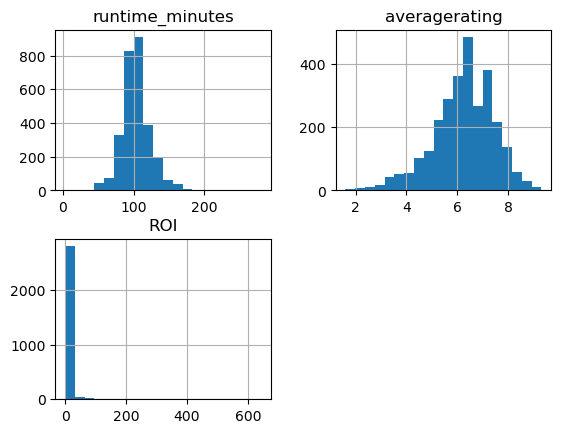

In [48]:
#Visualize the distribution of runtime, ratings, and ROI using histograms
merged_df3[['runtime_minutes', 'averagerating', 'ROI']].hist(bins=20)
plt.show()


In [49]:
#Check for correlations between variables:
merged_df3[['runtime_minutes', 'averagerating', 'ROI']].corr()

,runtime_minutes,averagerating,ROI
runtime_minutes,1.000000,0.203768,-0.028707
averagerating,0.203768,1.000000,0.007536
ROI,-0.028707,0.007536,1.000000


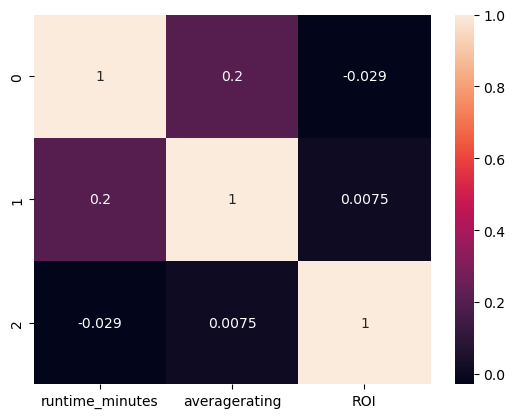

In [50]:
#Visualize the Above data
# create a dataframe with the correlation values
data = {'runtime_minutes': [1.000000, 0.203768, -0.028707],
        'averagerating': [0.203768, 1.000000, 0.007536],
        'ROI': [-0.028707, 0.007536, 1.000000]}
df = pd.DataFrame(data)

# create a heatmap using seaborn
sns.heatmap(df, annot=True)

# display the plot
plt.show()

# Grouping and aggregation


In [51]:
#Group by movie and calculate the mean rating and ROI
merged_df3.groupby('movie')[['averagerating', 'ROI']].mean()


,averagerating,ROI
movie,,
#Horror,3.000000,-1.00
10 Cloverfield Lane,7.200000,35.07
10 Days in a Madhouse,6.700000,-1.00
12 Rounds,8.100000,0.48
12 Strong,6.600000,2.34
...,...,...
Zoolander 2,4.700000,0.68
Zoom,6.233333,-0.30
Zootopia,8.000000,8.07


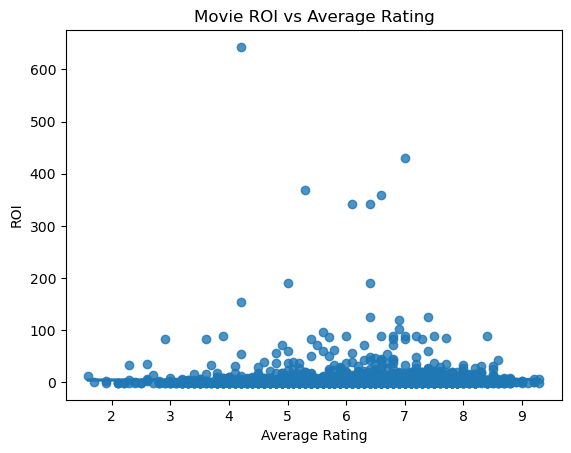

In [52]:
# create a scatter plot to visualize the correlation between Mean ROI and  averagerating 

sns.regplot(x='averagerating', y='ROI', data=merged_df3)

# set plot labels and title
plt.xlabel('Average Rating')
plt.ylabel('ROI')
plt.title('Movie ROI vs Average Rating')

# display the plot
plt.show()


In [53]:
#top 10 ROI
top10_movies = merged_df3.groupby('movie')['ROI'].mean().nlargest(10)
top10_movies_df = top10_movies.reset_index().rename(columns={'movie': 'Movie', 'ROI': 'Mean ROI'})
print(top10_movies_df)

                      Movie    Mean ROI
0               The Gallows  643.210000
1                     Bambi  431.160000
2                     Rocky  341.240000
3            Graduation Day  190.150000
4  Night of the Living Dead  185.365000
5          The Devil Inside  154.020000
6                 Halloween  135.823333
7                     Benji  125.240000
8                 Insidious  101.590000
9                Unfriended   96.150000


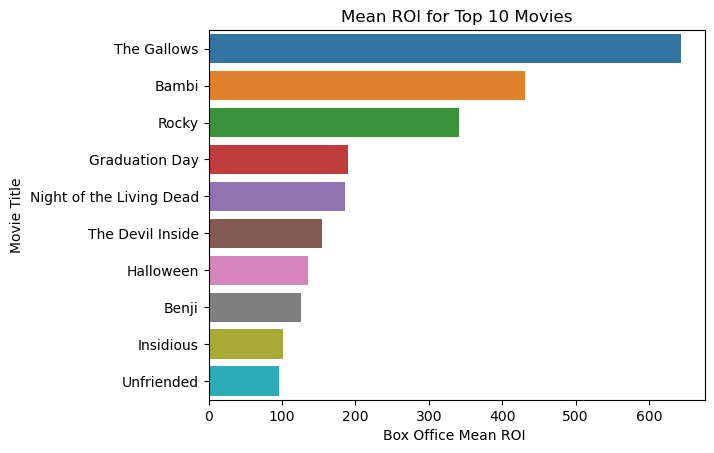

In [54]:
# create a horizontal bar chart
sns.barplot(x='Mean ROI', y='Movie', data=top10_movies_df)

# set plot labels and title
plt.xlabel('Box Office Mean ROI ')
plt.ylabel('Movie Title')
plt.title('Mean ROI for Top 10 Movies')

# display the plot
plt.show()

In [55]:
top10_ratings = merged_df3.groupby('movie')['averagerating'].mean().nlargest(10)
top10_ratings_df = top10_ratings.reset_index().rename(columns={'movie': 'Movie', 'averagerating': 'Averageratings'})
print(top10_ratings_df)

                 Movie  Averageratings
0          Richard III             9.1
1              Frailty             9.0
2            Inception             8.8
3  Message in a Bottle             8.8
4          Serendipity             8.8
5                Teeth             8.8
6             Snow Day             8.7
7             The Rock             8.7
8                  Yes             8.7
9       Butterfly Girl             8.6


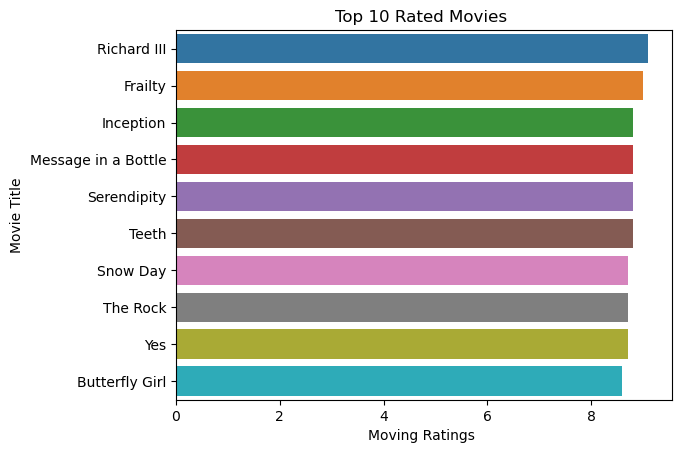

In [56]:
# create a horizontal bar chart
sns.barplot(x='Averageratings', y='Movie', data=top10_ratings_df)

# set plot labels and title
plt.xlabel('Moving Ratings ')
plt.ylabel('Movie Title')
plt.title('Top 10 Rated Movies ')

# display the plot
plt.show()

In [57]:
#Group by genre and calculate the median ROI
genre_ROI = merged_df3.groupby('genres')['ROI'].mean().nlargest(10)
genre_ROI_df = genre_ROI.reset_index().rename(columns={'genres': 'Genre', 'ROI': 'Mean ROI'})
print(genre_ROI_df)

                      Genre  Mean ROI
0     Biography,Documentary  73.22000
1        Crime,Drama,Family  66.44500
2      Drama,Family,Fantasy  62.97000
3      Action,Drama,Romance  44.96500
4       Action,Comedy,Drama  44.10625
5   Horror,Romance,Thriller  38.01000
6  Animation,Family,Fantasy  36.22000
7            Family,Fantasy  36.22000
8   Horror,Mystery,Thriller  33.38200
9         Documentary,Sport  31.19250


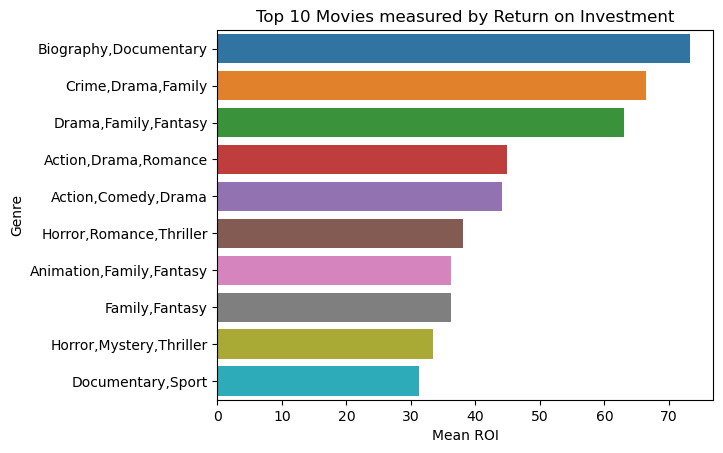

In [58]:
# create a horizontal bar chart
sns.barplot(x='Mean ROI', y='Genre', data=genre_ROI_df)

# set plot labels and title
plt.xlabel('Mean ROI')
plt.ylabel('Genre')
plt.title('Top 10 Movies measured by Return on Investment')

# display the plot
plt.show()

In [59]:
merged_df3.groupby('genres')['ROI'].median().nlargest(10)


genres
Crime,Drama,Family          66.445
Drama,Family,Fantasy        62.970
Horror,Romance,Thriller     38.010
Animation,Family,Fantasy    36.220
Family,Fantasy              36.220
Family,Fantasy,Musical      29.120
Crime,Fantasy,Thriller      25.200
Comedy,Documentary          19.560
Adventure,Horror            19.120
Biography,Drama,Fantasy     18.850
Name: ROI, dtype: float64

In [60]:
genretop_rating = merged_df3.groupby('genres')['averagerating'].mean().nlargest(10)
genretop_rating_df = genretop_rating.reset_index().rename(columns={'genres': 'Genre', 'averagerating': 'Average Rating'})
print(genretop_rating_df)

                             Genre  Average Rating
0         Action,Documentary,Drama           8.700
1                Crime,Documentary           8.250
2        Crime,Documentary,History           8.200
3        Documentary,Drama,History           8.100
4          Adventure,Drama,Mystery           7.900
5       Documentary,Sport,Thriller           7.900
6                            Sport           7.900
7  Adventure,Biography,Documentary           7.800
8                   Comedy,Musical           7.800
9      Biography,Documentary,Drama           7.725


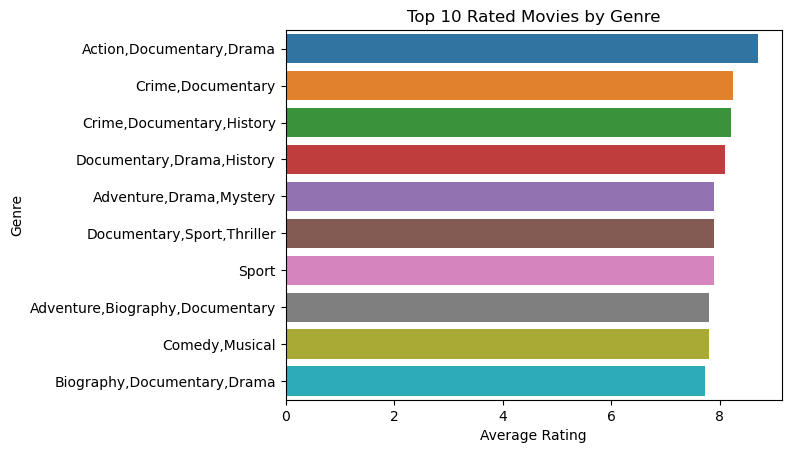

In [61]:
# create a horizontal bar chart
sns.barplot(x='Average Rating', y='Genre', data=genretop_rating_df)

# set plot labels and title
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top 10 Rated Movies by Genre')

# display the plot
plt.show()

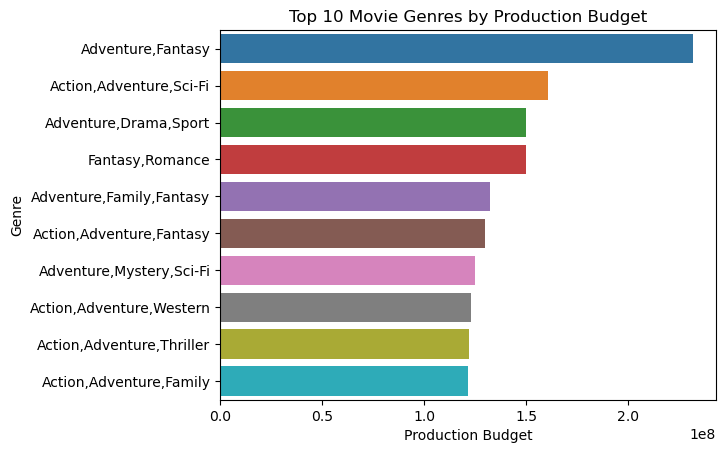

                       Genre  Production Budget
0          Adventure,Fantasy       2.316667e+08
1    Action,Adventure,Sci-Fi       1.606103e+08
2      Adventure,Drama,Sport       1.500000e+08
3            Fantasy,Romance       1.500000e+08
4   Adventure,Family,Fantasy       1.322750e+08
5   Action,Adventure,Fantasy       1.297650e+08
6   Adventure,Mystery,Sci-Fi       1.250000e+08
7   Action,Adventure,Western       1.231667e+08
8  Action,Adventure,Thriller       1.222143e+08
9    Action,Adventure,Family       1.215000e+08


In [62]:
genretop_prod = merged_df3.groupby('genres')['production_budget'].mean().nlargest(10)
genretop_prod_df = genretop_prod.reset_index().rename(columns={'genres': 'Genre', 'production_budget': 'Production Budget'})

# create a horizontal bar chart
sns.barplot(x='Production Budget', y='Genre', data=genretop_prod_df)

# set plot labels and title
plt.xlabel('Production Budget')
plt.ylabel('Genre')
plt.title('Top 10 Movie Genres by Production Budget')

# display the plot
plt.show()

print(genretop_prod_df)

In [63]:
#Data Filtering Highly rated
highlyrated = merged_df3[merged_df3['averagerating'] > 7]
highlyrated.head()


,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI
1,tt0326592,The Overnight,The Overnight,2010,88.0,Missing,7.5,24,21,2015-06-19,200000.0,1109808.0,1.165996e+06,10.38
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,91000000.0,58236838.0,1.878612e+08,1.70
12,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,15,2010-11-24,260000000.0,200821936.0,5.864772e+08,2.03
18,tt0433035,Real Steel,Real Steel,2011,127.0,"Action,Drama,Family",7.1,283534,31,2011-10-07,110000000.0,85463309.0,2.638803e+08,2.18
20,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,47,2010-06-18,200000000.0,415004880.0,1.068880e+09,6.42


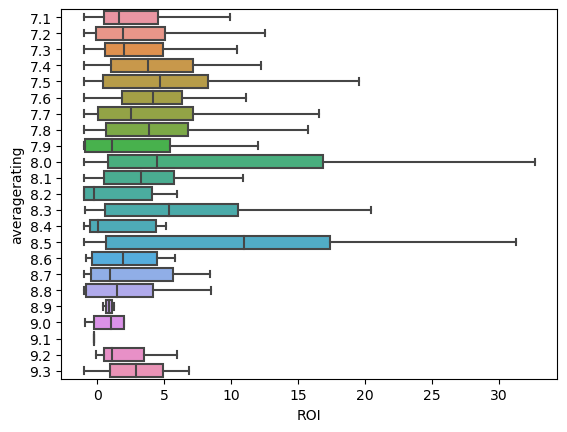

In [64]:
sns.boxplot(data=highlyrated, x='ROI', y='averagerating', orient='h', showfliers=False);

In [65]:
#Data Filtering Positive ROI
profitable = merged_df3[merged_df3['ROI'] > 0]
profitable.head()


,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI
1,tt0326592,The Overnight,The Overnight,2010,88.0,Missing,7.5,24,21,2015-06-19,200000.0,1109808.0,1.165996e+06,10.38
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,2015-06-19,200000.0,1109808.0,1.165996e+06,10.38
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,91000000.0,58236838.0,1.878612e+08,1.70
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,2014-09-19,28000000.0,26017685.0,6.210859e+07,2.15
8,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,2015-06-12,215000000.0,652270625.0,1.648855e+09,9.70


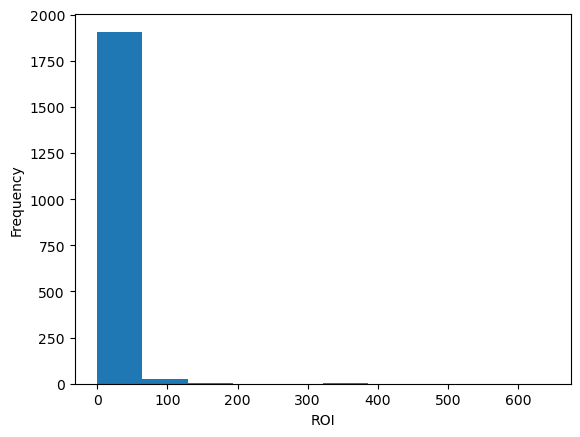

In [66]:
#Visualize Movies with Positive ROIs
plt.hist(profitable['ROI'])
plt.xlabel('ROI')
plt.ylabel('Frequency');


In [67]:
#Data Filtering Positive ROI
profitable = merged_df3[merged_df3['ROI'] < 0]
profitable.head(1000)

,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,45000000.0,0.0,73706.0,-1.00
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,25000000.0,720828.0,9313302.0,-0.60
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,2013-03-22,25000000.0,720828.0,9313302.0,-0.60
5,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,2013-03-22,25000000.0,720828.0,9313302.0,-0.60
9,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,16,2011-10-28,45000000.0,13109815.0,21544732.0,-0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",7.4,2724,8,2018-07-20,1500000.0,0.0,98806.0,-0.93
2861,tt8266310,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173,64,2019-08-14,15000000.0,0.0,0.0,-1.00
2866,tt8653840,Flawless,Haneshef,2018,97.0,Drama,6.4,34,14,1999-11-24,27000000.0,4485485.0,4485485.0,-0.67
2867,tt8655470,The Specials,Hors normes,2019,101.0,Comedy,7.2,13,89,2000-09-22,1000000.0,12996.0,12996.0,-0.97


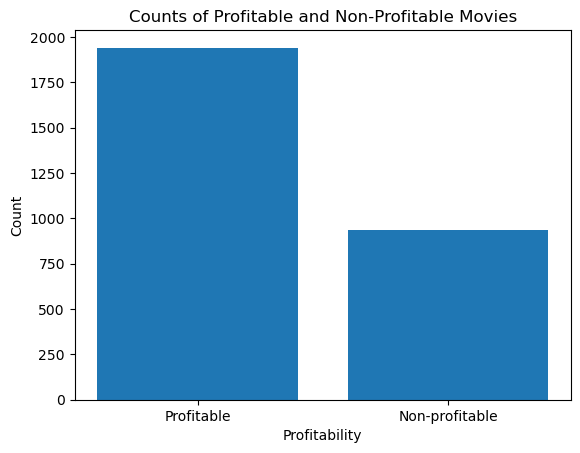

In [68]:
# Get the counts of profitable and non-profitable movies
profitable_count = (merged_df3['ROI'] > 0).sum()
non_profitable_count = (merged_df3['ROI'] <= 0).sum()

# Create a bar chart
plt.bar(['Profitable', 'Non-profitable'], [profitable_count, non_profitable_count])
plt.xlabel('Profitability')
plt.ylabel('Count')
plt.title('Counts of Profitable and Non-Profitable Movies');

# Time Series Analysis

In [69]:
#Group by release year and calculate the mean rating and ROI
df.groupby(merged_df3['release_date'].dt.year)[['averagerating', 'ROI']].mean()


,averagerating,ROI
release_date,,
2012,0.203768,-0.028707
2015,0.503768,0.503768


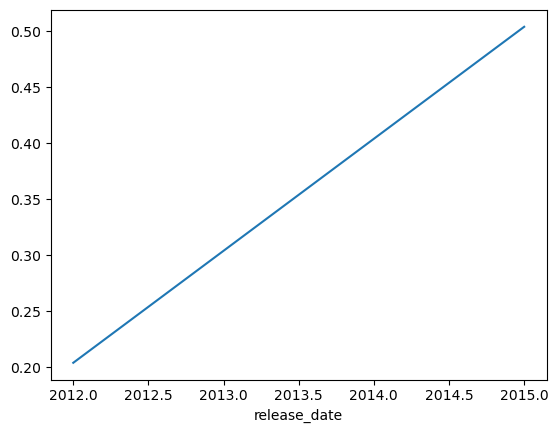

In [70]:
#Create a time series plot of the average rating over time
df.groupby(merged_df3['release_date'].dt.year)['averagerating'].mean().plot()
plt.show()


# Data merging

In [71]:
#Reading directors information from the SQL table
pd.read_sql("""SELECT * FROM directors;""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


# Merging with directors table

In [72]:
#Merged with directors information
director_df = pd.read_sql("""SELECT * FROM directors;""", conn)
merged_df4 = pd.merge(merged_df3, director_df, on='movie_id', how ='inner')
merged_df4.head()


,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI,person_id
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,45000000.0,0.0,73706.0,-1.0,nm0440415
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,45000000.0,0.0,73706.0,-1.0,nm0440415
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,45000000.0,0.0,73706.0,-1.0,nm0440415
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,45000000.0,0.0,73706.0,-1.0,nm0440415
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,45000000.0,0.0,73706.0,-1.0,nm0440415


In [73]:
#Merged with Writers information from SQL
writer_df = pd.read_sql("""SELECT * FROM writers;""", conn)
merged_df5 = pd.merge(merged_df4, writer_df, on='movie_id', how ='inner')
merged_df5.head()

,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI,person_id_x,person_id_y
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,45000000.0,0.0,73706.0,-1.0,nm0440415,nm0440415
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,45000000.0,0.0,73706.0,-1.0,nm0440415,nm0923312
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,45000000.0,0.0,73706.0,-1.0,nm0440415,nm0295165
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,45000000.0,0.0,73706.0,-1.0,nm0440415,nm0841854
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,45000000.0,0.0,73706.0,-1.0,nm0440415,nm0220297


In [74]:
#Merged with Movie akas
maka_df = pd.read_sql("""SELECT * FROM movie_akas;""", conn)
merged_df6 = pd.merge(merged_df5, maka_df, on='movie_id', how ='inner')
merged_df6.head()

,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,...,ROI,person_id_x,person_id_y,ordering,title,region,language,types,attributes,is_original_title
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,-1.0,nm0440415,nm0440415,10,Foodfight!,FI,None,imdbDisplay,None,0.0
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,-1.0,nm0440415,nm0440415,11,Foodfight!,SE,None,imdbDisplay,None,0.0
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,-1.0,nm0440415,nm0440415,1,A Guerra das Comidas,BR,None,imdbDisplay,None,0.0
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,-1.0,nm0440415,nm0440415,2,Foodfight!,US,None,None,None,0.0
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,-1.0,nm0440415,nm0440415,3,Toidusõda!,EE,None,imdbDisplay,None,0.0


In [75]:
#Merged with principals
mprinc_df = pd.read_sql("""SELECT * FROM principals;""", conn)
merged_df7 = pd.merge(merged_df6, mprinc_df, on='movie_id', how ='inner')
merged_df7.head()

,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,...,region,language,types,attributes,is_original_title,ordering_y,person_id,category,job,characters
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,FI,None,imdbDisplay,None,0.0,10,nm0257258,producer,producer,None
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,FI,None,imdbDisplay,None,0.0,1,nm0240381,actress,None,"[""Sunshine Goodness""]"
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,FI,None,imdbDisplay,None,0.0,2,nm0240380,actress,None,"[""Sweetcakes""]"
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,FI,None,imdbDisplay,None,0.0,3,nm0000221,actor,None,"[""Dex Dogtective""]"
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,FI,None,imdbDisplay,None,0.0,4,nm0519456,actress,None,"[""Lady X""]"


In [76]:
#Memerged with 
merged_final_df = pd.merge(merged_df7, tmdb_movie, on='title', how ='inner')
merged_final_df.head()

,movie_id,movie,original_title_x,start_year,runtime_minutes,genres,averagerating,numvotes,id_x,release_date_x,...,characters,Unnamed: 0,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,vote_average,vote_count
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,None,8456,"[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,2.1,46
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,"[""Sunshine Goodness""]",8456,"[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,2.1,46
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,"[""Sweetcakes""]",8456,"[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,2.1,46
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,"[""Dex Dogtective""]",8456,"[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,2.1,46
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,...,"[""Lady X""]",8456,"[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,2.1,46


In [77]:
merged_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9781871 entries, 0 to 9781870
Data columns (total 37 columns):
 #   Column             Dtype         
---  ------             -----         
 0   movie_id           object        
 1   movie              object        
 2   original_title_x   object        
 3   start_year         int64         
 4   runtime_minutes    float64       
 5   genres             object        
 6   averagerating      float64       
 7   numvotes           int64         
 8   id_x               int64         
 9   release_date_x     datetime64[ns]
 10  production_budget  float64       
 11  domestic_gross     float64       
 12  worldwide_gross    float64       
 13  ROI                float64       
 14  person_id_x        object        
 15  person_id_y        object        
 16  ordering_x         int64         
 17  title              object        
 18  region             object        
 19  language           object        
 20  types              objec

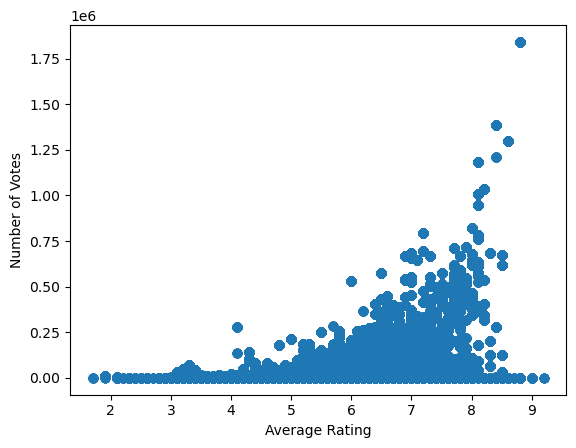

In [78]:
plt.scatter(merged_final_df['averagerating'], merged_final_df['numvotes'])
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

In [79]:
corr_coeff = merged_final_df['numvotes'].corr(merged_final_df['averagerating'])

print('Correlation coefficient between numvotes and averagerating: ', corr_coeff)

Correlation coefficient between numvotes and averagerating:  0.5124943038145994


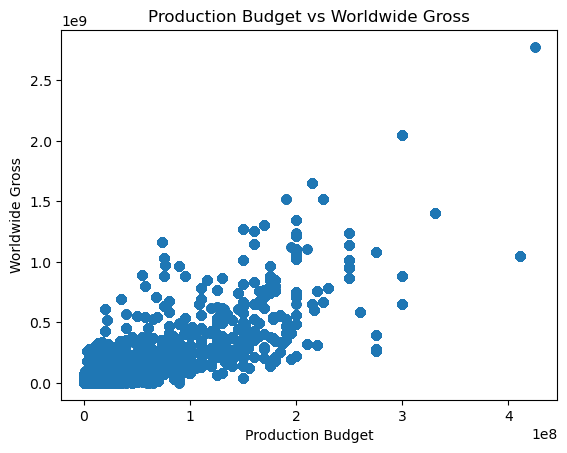

In [80]:
plt.scatter(merged_final_df['production_budget'], merged_final_df['worldwide_gross'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs Worldwide Gross')
plt.show()

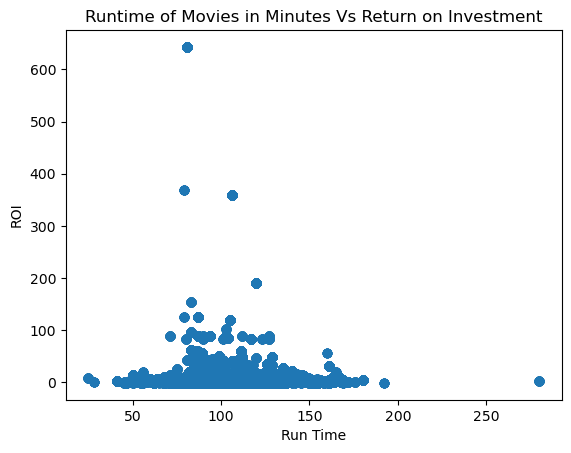

In [81]:
plt.scatter(merged_final_df['runtime_minutes'], merged_final_df['ROI'])
plt.xlabel('Run Time')
plt.ylabel('ROI')
plt.title('Runtime of Movies in Minutes Vs Return on Investment')
plt.show()

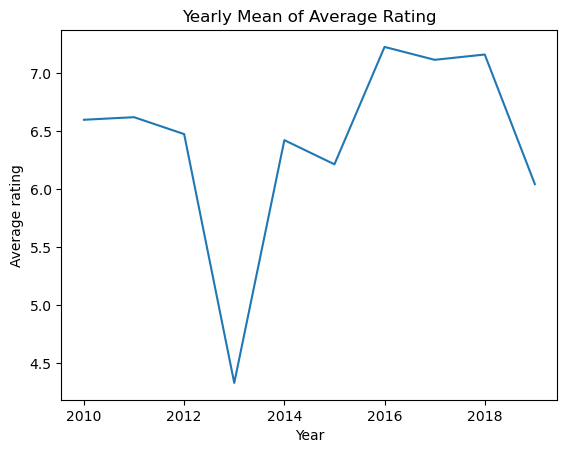

In [82]:
df_yearly_mean = merged_final_df.groupby('start_year')['averagerating'].mean()
# Create a line plot of the yearly mean
plt.plot(df_yearly_mean.index, df_yearly_mean.values)
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Yearly Mean of Average Rating')
plt.show()



In [83]:
#This was a test to check if merged_df3 dataframe had indeed merged with the budgets_movie after changing the primary_title 
word = 'Pirates of the Caribbean: On Stranger Tides'

filtered_df3 = merged_df3[merged_df3['movie'].str.contains(word)]

# print the resulting filtered dataframe
print(filtered_df3)

      movie_id                                        movie  \
463  tt1298650  Pirates of the Caribbean: On Stranger Tides   

                                  original_title  start_year  runtime_minutes  \
463  Pirates of the Caribbean: On Stranger Tides        2011            136.0   

                       genres  averagerating  numvotes  id release_date  \
463  Action,Adventure,Fantasy            6.6    447624   2   2011-05-20   

     production_budget  domestic_gross  worldwide_gross   ROI  
463        410600000.0     241063875.0     1.045664e+09  2.13  


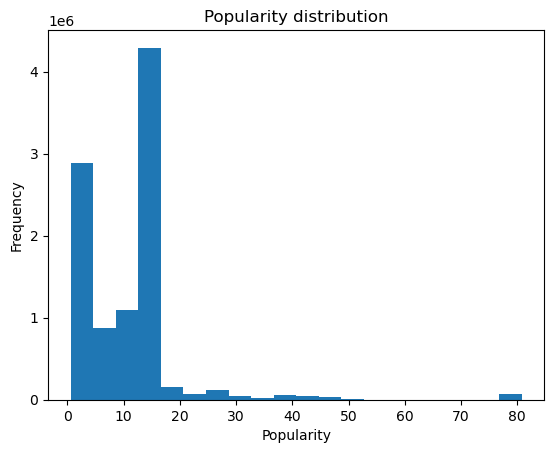

In [84]:
# Create a histogram of the popularity distribution 
plt.hist(merged_final_df['popularity'], bins=20)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity distribution')
plt.show()

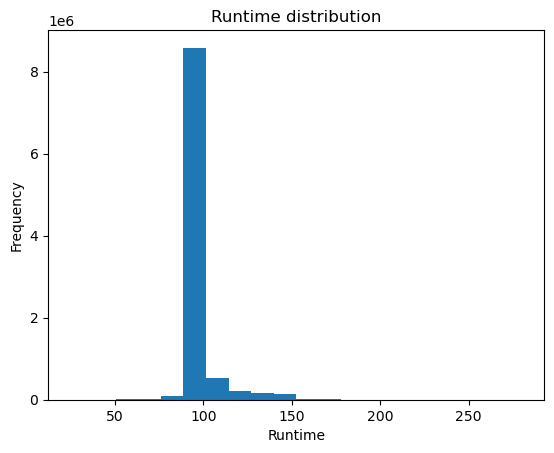

In [85]:
plt.hist(merged_final_df['runtime_minutes'], bins=20)
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Runtime distribution')
plt.show()

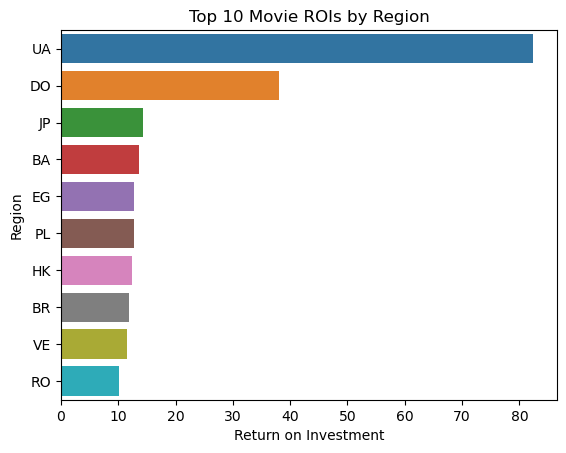

In [86]:
regiontop_prod = merged_final_df.groupby('region')['ROI'].mean().nlargest(10)
regiontop_prod_df = regiontop_prod.reset_index().rename(columns={'region': 'Region', 'ROI': 'Return on Investment'})

# create a horizontal bar chart
sns.barplot(x='Return on Investment', y='Region', data=regiontop_prod_df)

# set plot labels and title
plt.xlabel('Return on Investment')
plt.ylabel('Region')
plt.title('Top 10 Movie ROIs by Region')

# display the plot
plt.show()

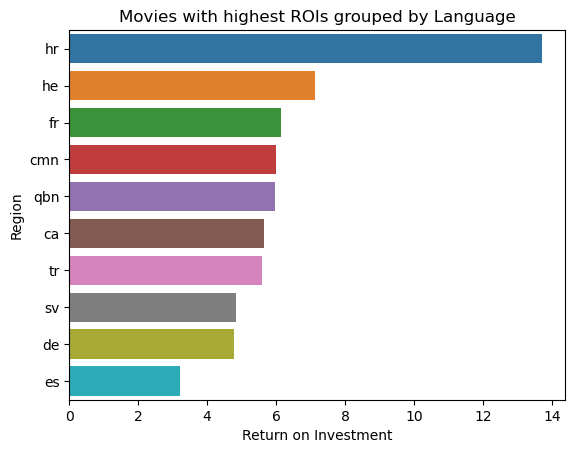

In [87]:
langtop_prod = merged_final_df.groupby('language')['ROI'].mean().nlargest(10)
langtop_prod_df = langtop_prod.reset_index().rename(columns={'language': 'Language', 'ROI': 'Return on Investment'})

# create a horizontal bar chart
sns.barplot(x='Return on Investment', y='Language', data=langtop_prod_df)

# set plot labels and title
plt.xlabel('Return on Investment')
plt.ylabel('Region')
plt.title('Movies with highest ROIs grouped by Language')

# display the plot
plt.show()

In [88]:
print(merged_final_df.columns)

Index(['movie_id', 'movie', 'original_title_x', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'id_x',
       'release_date_x', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'ROI', 'person_id_x', 'person_id_y', 'ordering_x',
       'title', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'ordering_y', 'person_id', 'category', 'job',
       'characters', 'Unnamed: 0', 'genre_ids', 'id_y', 'original_language',
       'original_title_y', 'popularity', 'release_date_y', 'vote_average',
       'vote_count'],
      dtype='object')


In [89]:
merged_final_df.sort_values(by='ROI', ascending=False)[["movie", "region","language","popularity","runtime_minutes", "ROI", "averagerating", "genres"]].head(10)


,movie,region,language,popularity,runtime_minutes,ROI,averagerating,genres
9153947,The Gallows,None,None,6.477,81.0,643.21,4.2,"Horror,Mystery,Thriller"
9153772,The Gallows,None,None,9.166,81.0,643.21,4.2,"Horror,Mystery,Thriller"
9153770,The Gallows,US,None,9.166,81.0,643.21,4.2,"Horror,Mystery,Thriller"
9153769,The Gallows,US,None,9.166,81.0,643.21,4.2,"Horror,Mystery,Thriller"
9153768,The Gallows,US,None,9.166,81.0,643.21,4.2,"Horror,Mystery,Thriller"
9153767,The Gallows,US,None,9.166,81.0,643.21,4.2,"Horror,Mystery,Thriller"
9153766,The Gallows,US,None,9.166,81.0,643.21,4.2,"Horror,Mystery,Thriller"
9153765,The Gallows,US,None,9.166,81.0,643.21,4.2,"Horror,Mystery,Thriller"
9153764,The Gallows,US,None,9.166,81.0,643.21,4.2,"Horror,Mystery,Thriller"
9153763,The Gallows,US,None,9.166,81.0,643.21,4.2,"Horror,Mystery,Thriller"


In [90]:
sns.heatmap(data=top_10[['production_budget', 'domestic_gross', 'worldwide_gross']].corr(), cmap='coolwarm', annot=True);

NameError: name 'top_10' is not defined